In [1]:
#------------------------------------#
#------------- packages--------------#
#------------------------------------#

import pandas as pd
from datetime import date
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.figure_factory as ff
import cufflinks as cf
cf.go_offline()

import missingno as msno
import os

In [ ]:
#------------------------------------#
#---------- read par list------------#
#------------------------------------#

list_par = pd.read_csv("/Users/beatriceli/Documents/PhD_Research/GitHub/well-being/StudyParticipants.csv")
# par_dic = dict(zip(list_par["Participant ID"]))

## Baseline Survey

In [21]:
# breakdown baseline

survey_base = pd.read_csv("/Users/beatriceli/Documents/PhD_Research/GitHub/well-being/cleaned-surveys/Baseline.csv",parse_dates=["StartDate","EndDate"])
survey_base["date"] = pd.to_datetime(survey_base["StartDate"]).dt.date

# Q2 is the question about age; need to convert to date m/dd/yy 
survey_base["Q2"] = pd.to_datetime(survey_base["Q2"], format='%m/%d/%y').dt.date

# calculate age from Q2 at the time of survey
survey_base["age"] = (survey_base["date"] - survey_base["Q2"]).dt.days/365

survey_base.head()


,StartDate,EndDate,Duration (in seconds),RecordedDate,Q2,Q3,Q4,Q5,Q6,Q7,...,Q58_5,Q58_6,Q58_7,Q53_1,Q60_1,Q49_1,Q49_2,pid,date,age
0,2022-04-26 09:03:00,2022-04-26 09:20:00,998,4/26/22 9:20,1994-09-25,Male,Asian,Non-Hispanic,China,Graduate Student,...,Somewhat satisfied,Extremely satisfied,Neither satisfied nor dissatisfied,1.0,3.0,6-8 hours,Less than 2 hours,edr,2022-04-26,27.602740
1,2022-04-26 18:34:00,2022-04-26 18:43:00,550,4/26/22 18:43,1986-06-02,Male,Caucasian/White,Hispanic/ Latino or of Spanish origin,Brazil,Graduate Student,...,Somewhat satisfied,Somewhat satisfied,Somewhat satisfied,3.0,4.0,6-8 hours,Less than 2 hours,egl,2022-04-26,35.923288
2,2022-04-27 12:13:00,2022-04-27 12:22:00,539,4/27/22 12:22,1995-08-07,Male,Middle Eastern,Non-Hispanic,Iran,Graduate Student,...,Extremely satisfied,Extremely satisfied,Somewhat dissatisfied,3.0,3.0,4-6 hours,2-4 hours,uja,2022-04-27,26.739726
3,2022-04-28 14:14:00,2022-04-28 14:22:00,517,4/28/22 14:22,1995-06-28,Male,Asian,Non-Hispanic,China,Graduate Student,...,Extremely satisfied,Extremely satisfied,Extremely dissatisfied,4.0,4.0,2-4 hours,6-8 hours,lpz,2022-04-28,26.852055
4,2022-04-28 16:38:00,2022-04-28 16:45:00,383,4/28/22 16:45,1996-09-17,Female,Asian,Non-Hispanic,Bangladesh,Graduate Student,...,Extremely dissatisfied,Neither satisfied nor dissatisfied,Extremely dissatisfied,2.0,NaN,4-6 hours,More thank 10 hours,j02,2022-04-28,25.627397


In [24]:
# get age for each participant and round down to nearest integer
survey_base["age"] = survey_base.groupby("pid")["age"].transform("min").round(0)
# print out the age for each participant
survey_base[["pid","age"]]

,pid,age
0,edr,28.0
1,egl,36.0
2,uja,27.0
3,lpz,27.0
4,j02,26.0
5,heh,26.0
6,mr1,28.0
7,xil,27.0
8,pgm,34.0
9,vxx,52.0


In [32]:
# breakdown of gender
gender = survey_base['Q3'].value_counts()

# racial background
# rename Q4 to race
survey_base.rename(columns={"Q4":"race"},inplace=True)
# group particpants by race 
survey_base.groupby(["race"])["pid"].count()

race
Asian                               5
Caucasian/White                     5
Caucasian/White,African American    1
Middle Eastern                      2
Name: pid, dtype: int64

## Daily Check-In Survey

In [97]:
#------------------------------------#
#-------read check-in survey---------#
#------------------------------------#

daily = pd.read_csv("/Users/beatriceli/Documents/PhD_Research/GitHub/well-being/cleaned-surveys/daily.csv",parse_dates=["StartDate","EndDate","RecordedDate"])
# drop StartDate, EndDate, Progress, Duration (in seconds), Finished
daily.drop(["StartDate","EndDate","Progress","Duration (in seconds)","Finished"],axis=1,inplace=True)
daily.head()

,RecordedDate,RecipientLastName,LocationLatitude,LocationLongitude,Q3_1,Q4,Q15,Q6,Q28,Q29,...,Q35_1,Q36_1,Q37_1,Q22_1,Q23_1,Q27_1,Q34,Q34_6_TEXT,Q35,pid
0,2022-04-27,fX3ldshke76h,38.0321,-78.489,5.0,None,4/27/22 0:30,4/27/22 7:20,Did not exercise,"My Friends,My colleagues/classsmates/students",...,NaN,NaN,NaN,NaN,4.0,5.0,"Neutral,Stressed",NaN,Work,edr
1,2022-04-27,vUcMWfpPa8sm,38.0321,-78.489,4.0,None,4/27/22 0:40,4/27/22 9:00,In the afternoon,"My Friends,My colleagues/classsmates/students",...,NaN,NaN,NaN,NaN,NaN,5.0,Neutral,NaN,Work,egl
2,2022-04-27,OGkKFHbdNYm8,38.0321,-78.489,NaN,Twice,4/27/22 2:35,4/27/22 10:30,In the evening,"My Friends,New people",...,NaN,NaN,5.0,2.0,3.0,3.0,Stressed,NaN,Work,uja
3,2022-04-28,OGkKFHbdNYm8,38.0321,-78.489,3.0,Twice,4/28/22 3:15,4/28/22 10:30,Did not exercise,My Friends,...,NaN,NaN,NaN,4.0,3.0,3.0,"Neutral,Sadness,Frustrated",NaN,"Work,Sleep",uja
4,2022-04-28,fX3ldshke76h,38.0321,-78.489,5.0,None,4/28/22 2:00,4/28/22 10:00,In the evening,"My Family,My Friends,My colleagues/classsmates...",...,NaN,NaN,5.0,5.0,NaN,6.0,"Neutral,Happiness",NaN,"Work,Personal",edr


In [86]:
# get count of rows for each pid
daily.groupby(["pid"])["RecordedDate"].count()

pid
edr    45
egl    52
h9u    59
heh    59
j02    36
lpz    58
mr1    44
oyb    44
pgm    35
ssg    42
uja    48
vxx    50
xil    43
Name: RecordedDate, dtype: int64

In [87]:
daily.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 644 entries, 0 to 643
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   RecordedDate       615 non-null    datetime64[ns]
 1   RecipientLastName  615 non-null    object        
 2   LocationLatitude   615 non-null    float64       
 3   LocationLongitude  615 non-null    float64       
 4   Q3_1               589 non-null    float64       
 5   Q4                 615 non-null    object        
 6   Q15                615 non-null    object        
 7   Q6                 615 non-null    object        
 8   Q28                614 non-null    object        
 9   Q29                615 non-null    object        
 10  Q33_1              63 non-null     float64       
 11  Q34_1              106 non-null    float64       
 12  Q35_1              144 non-null    float64       
 13  Q36_1              126 non-null    float64       
 14  Q37_1     

In [88]:
# Q33_1, Q34_1, Q35_1, Q36_1 and Q37_1 are attention check questions
# check if each partcipant answered at least one of the attention check questions
daily["attention_check"] = daily[["Q33_1","Q34_1","Q35_1","Q36_1","Q37_1"]].notnull().any(axis=1)
# get "pid", "Q33_1", "Q34_1", "Q35_1", "Q36_1", "Q37_1", "attenion_check" columns
daily[["pid","Q33_1","Q34_1","Q35_1","Q36_1","Q37_1","attention_check"]]

,pid,Q33_1,Q34_1,Q35_1,Q36_1,Q37_1,attention_check
0,edr,NaN,NaN,NaN,NaN,NaN,False
1,egl,NaN,2.0,NaN,NaN,NaN,True
2,uja,NaN,NaN,NaN,NaN,5.0,True
3,uja,1.0,NaN,NaN,NaN,NaN,True
4,edr,NaN,NaN,NaN,NaN,5.0,True
...,...,...,...,...,...,...,...
639,ssg,1.0,NaN,NaN,NaN,NaN,True
640,h9u,NaN,2.0,NaN,NaN,NaN,True
641,h9u,NaN,2.0,NaN,NaN,NaN,True
642,h9u,NaN,2.0,NaN,NaN,NaN,True


In [89]:
# how many responses did not respond to attention check
daily["attention_check"].value_counts()

# True: 554; False: 90

True     554
False     90
Name: attention_check, dtype: int64

In [71]:
# if there is a response to Q33_1, check if the value is 1
attn = daily["Q33_1"]
# drop null values
attn = attn.dropna()
# how many values are not 1
attn[attn != 1].count()

# if there is a response to Q34_1, check if the value is 2
attn = daily["Q34_1"]
# drop null values
attn = attn.dropna()
# how many values are not 2
attn[attn != 2].count()

# if there is a response to Q35_1, check if the value is 3
attn = daily["Q35_1"]
# drop null values
attn = attn.dropna()
# how many values are not 3
attn[attn != 3].count()

# if there is a response to Q36_1, check if the value is 4
attn = daily["Q36_1"]
# drop null values
attn = attn.dropna()
# how many values are not 4
attn[attn != 4].count()

 # if there is a response to Q37_1, check if the value is 5
attn = daily["Q37_1"]
# drop null values
attn = attn.dropna()
# how many values are not 5
attn[attn != 5].count()

## The responses that did not respond to attention check questions probably had the slider issue in qualtrics
# The reponses to attention check questions were all correct

0

In [90]:
# remove attention check questions
daily.drop(columns=["Q33_1","Q34_1","Q35_1","Q36_1","Q37_1"],inplace=True)

<AxesSubplot: >

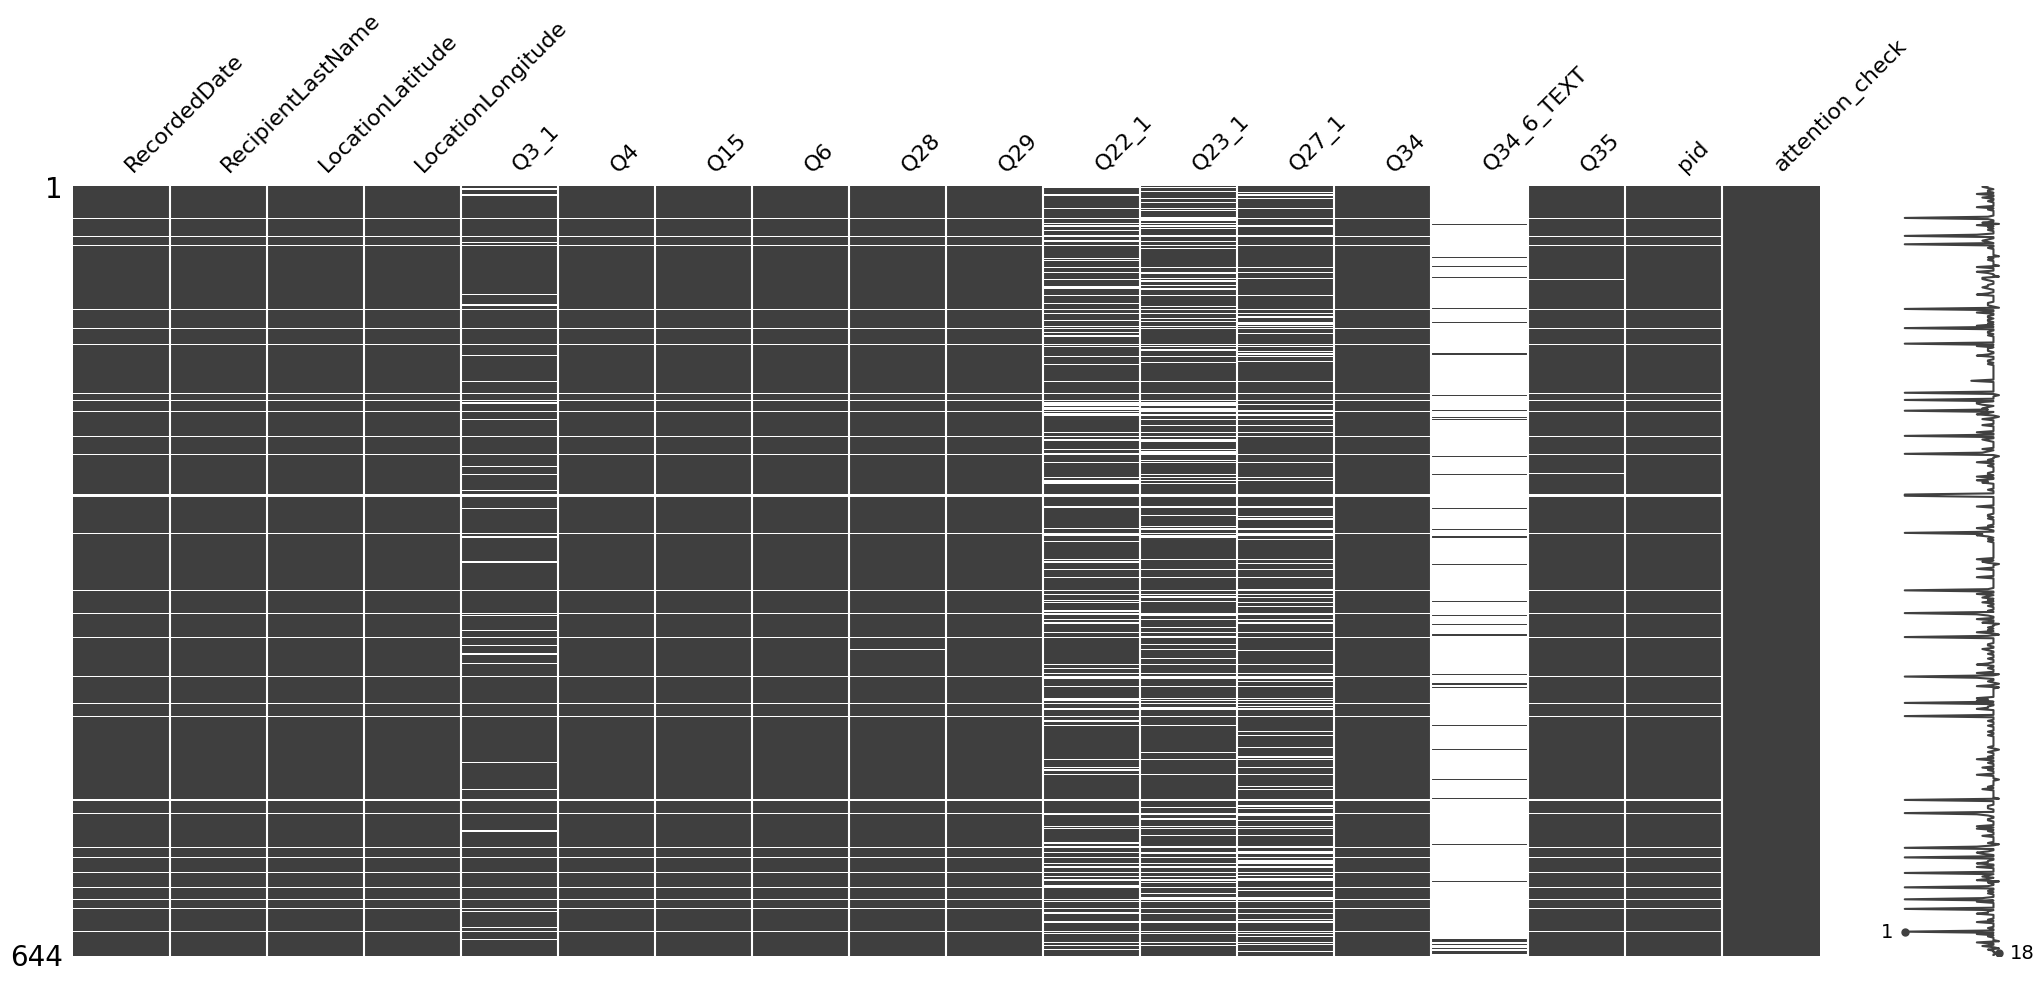

In [91]:
# create missing value matrix
msno.matrix(daily)

<AxesSubplot: >

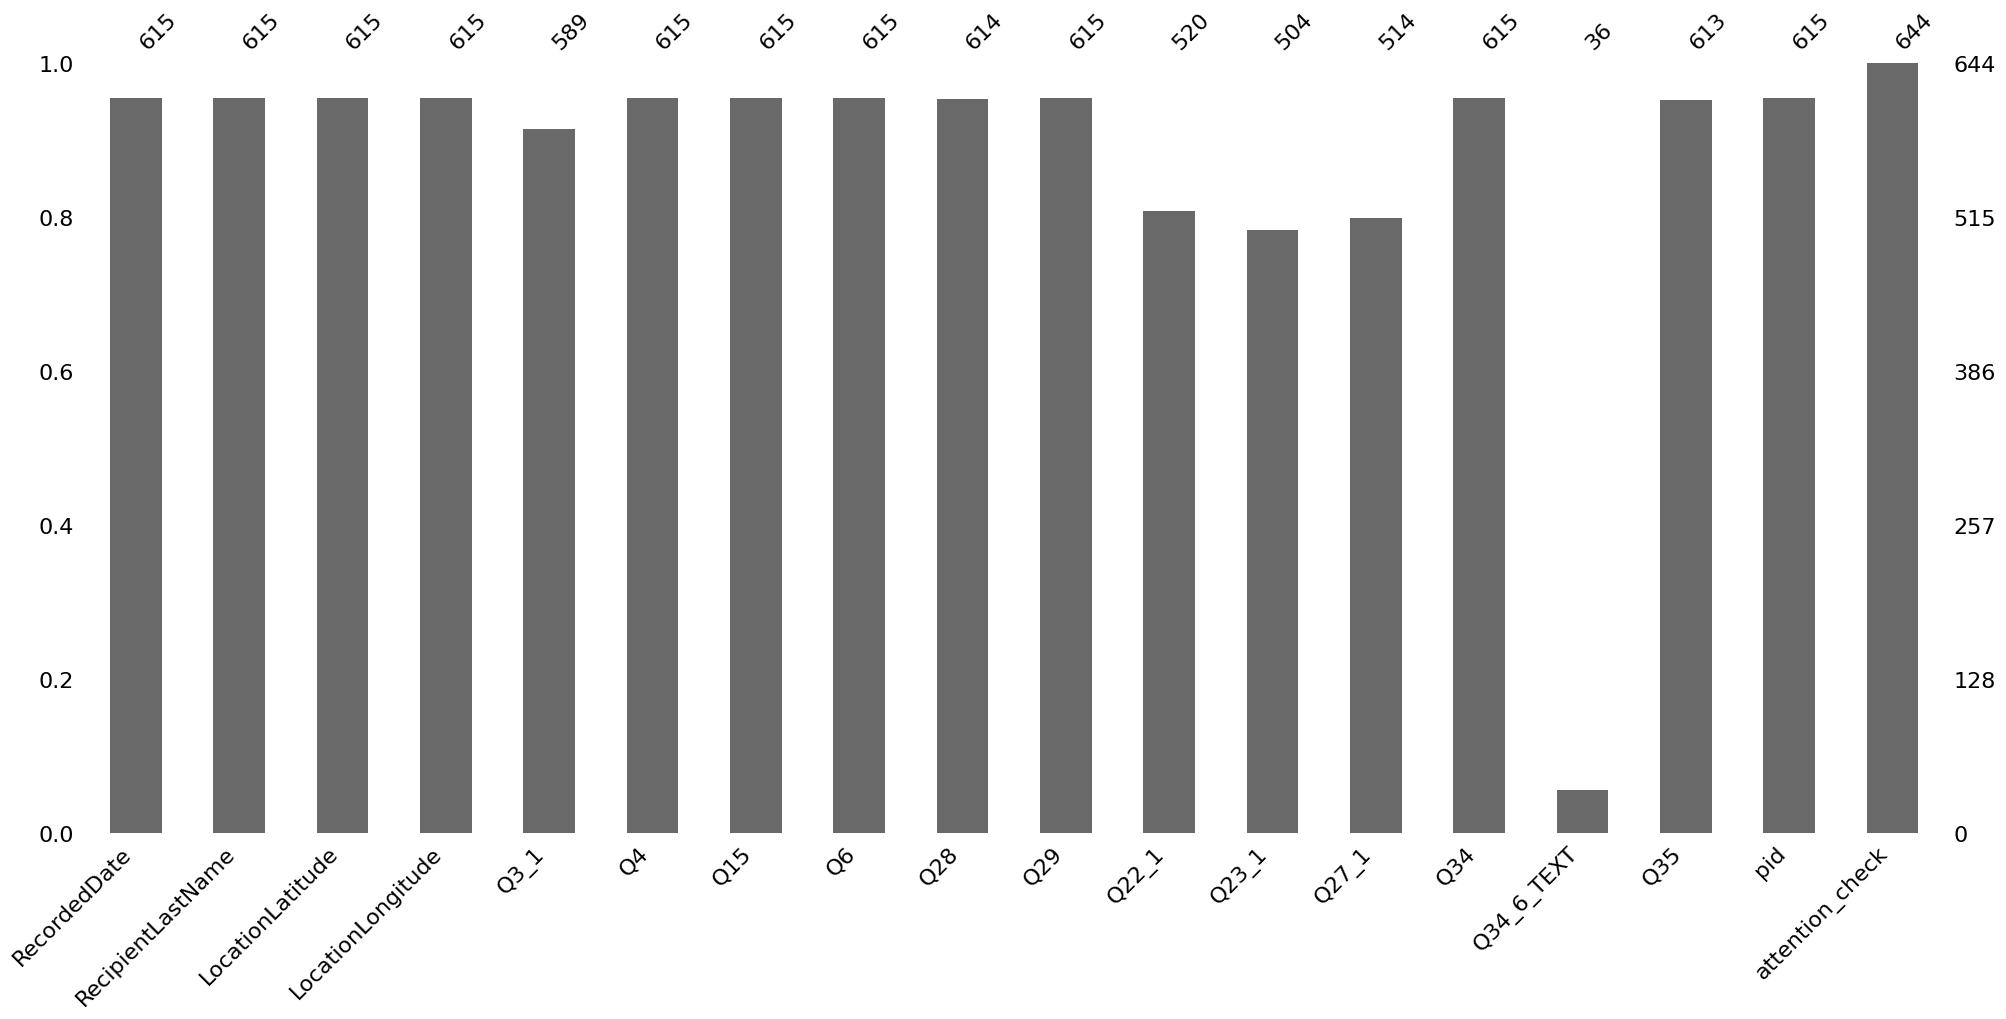

In [92]:
msno.bar(daily)

<AxesSubplot: >

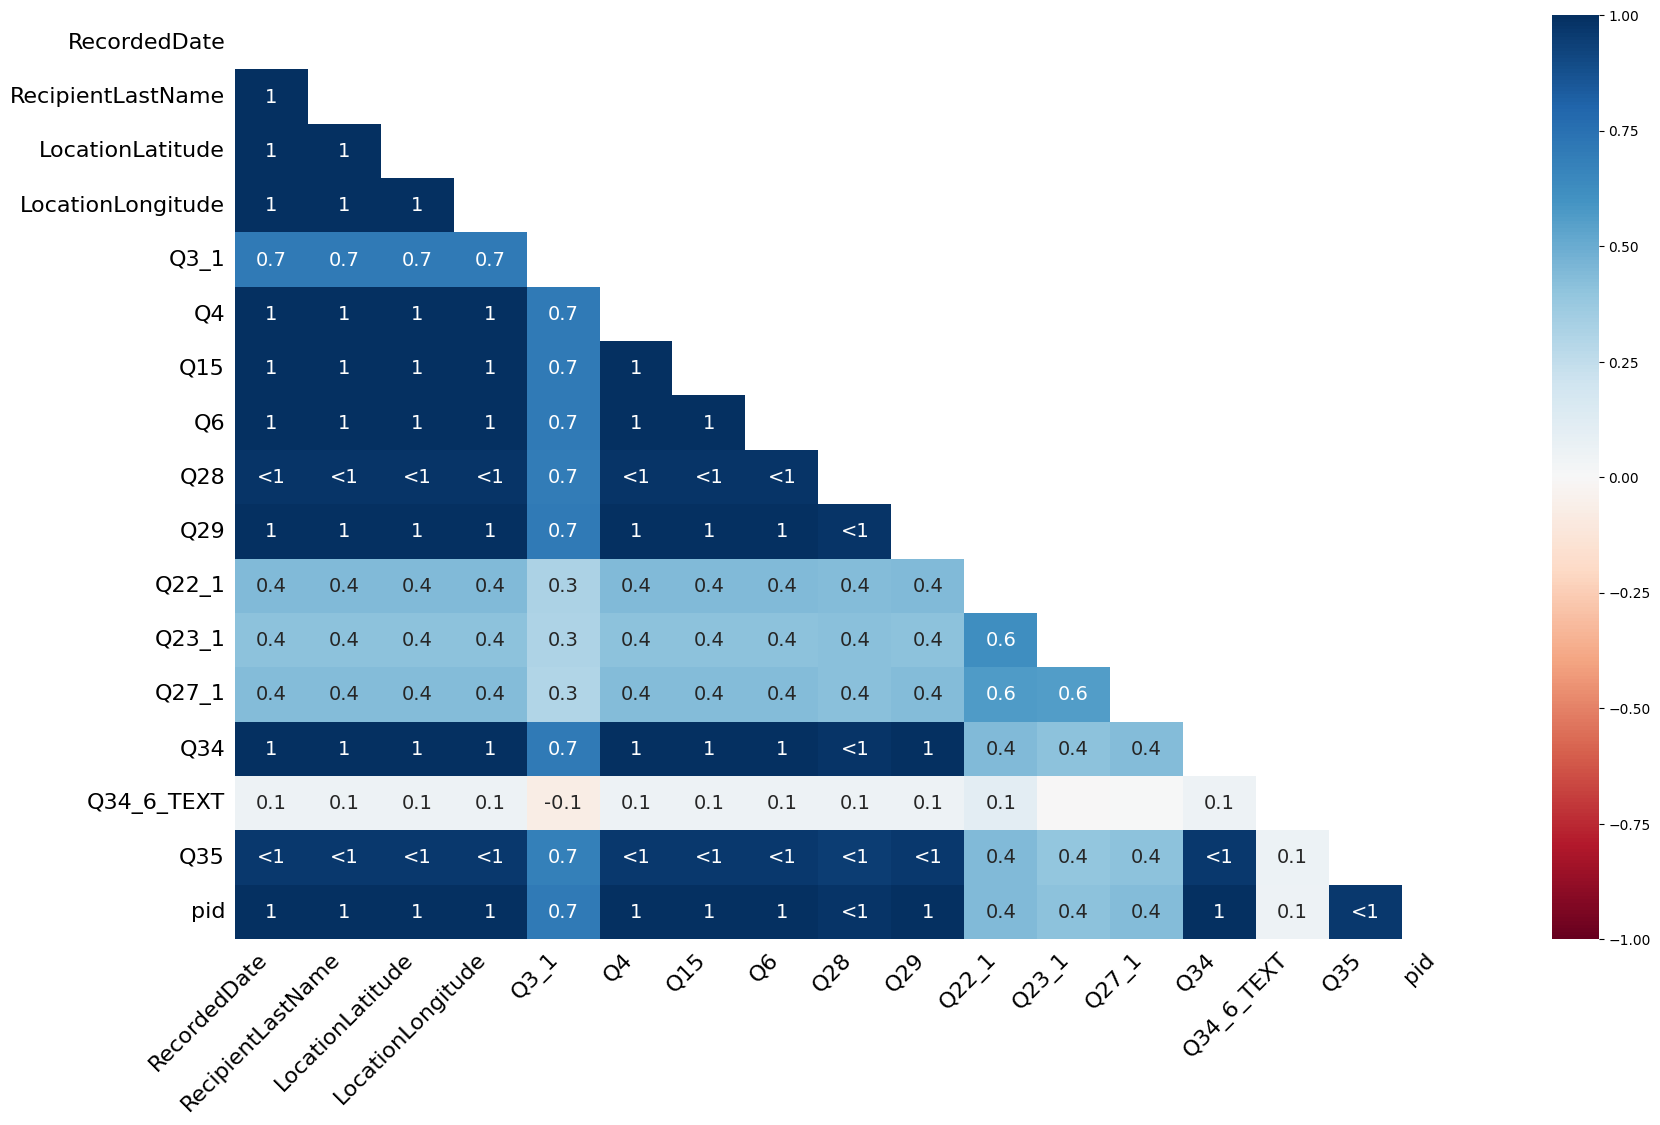

In [93]:
# This plot displays a heat map that shows a correlation between variables. 
# It measures a nullity correlation, an indicator of how strongly the absence of a variable to another variable is.
# Nullity correlation ranges from -1 (if one variable appears the other definitely does not) to 0 (variables appearing or not appearing have no effect on one another) 
# to 1 (if one variable appears the other definitely also does).
# https://github.com/ResidentMario/missingno/blob/master/README.md
msno.heatmap(daily)

<AxesSubplot: >

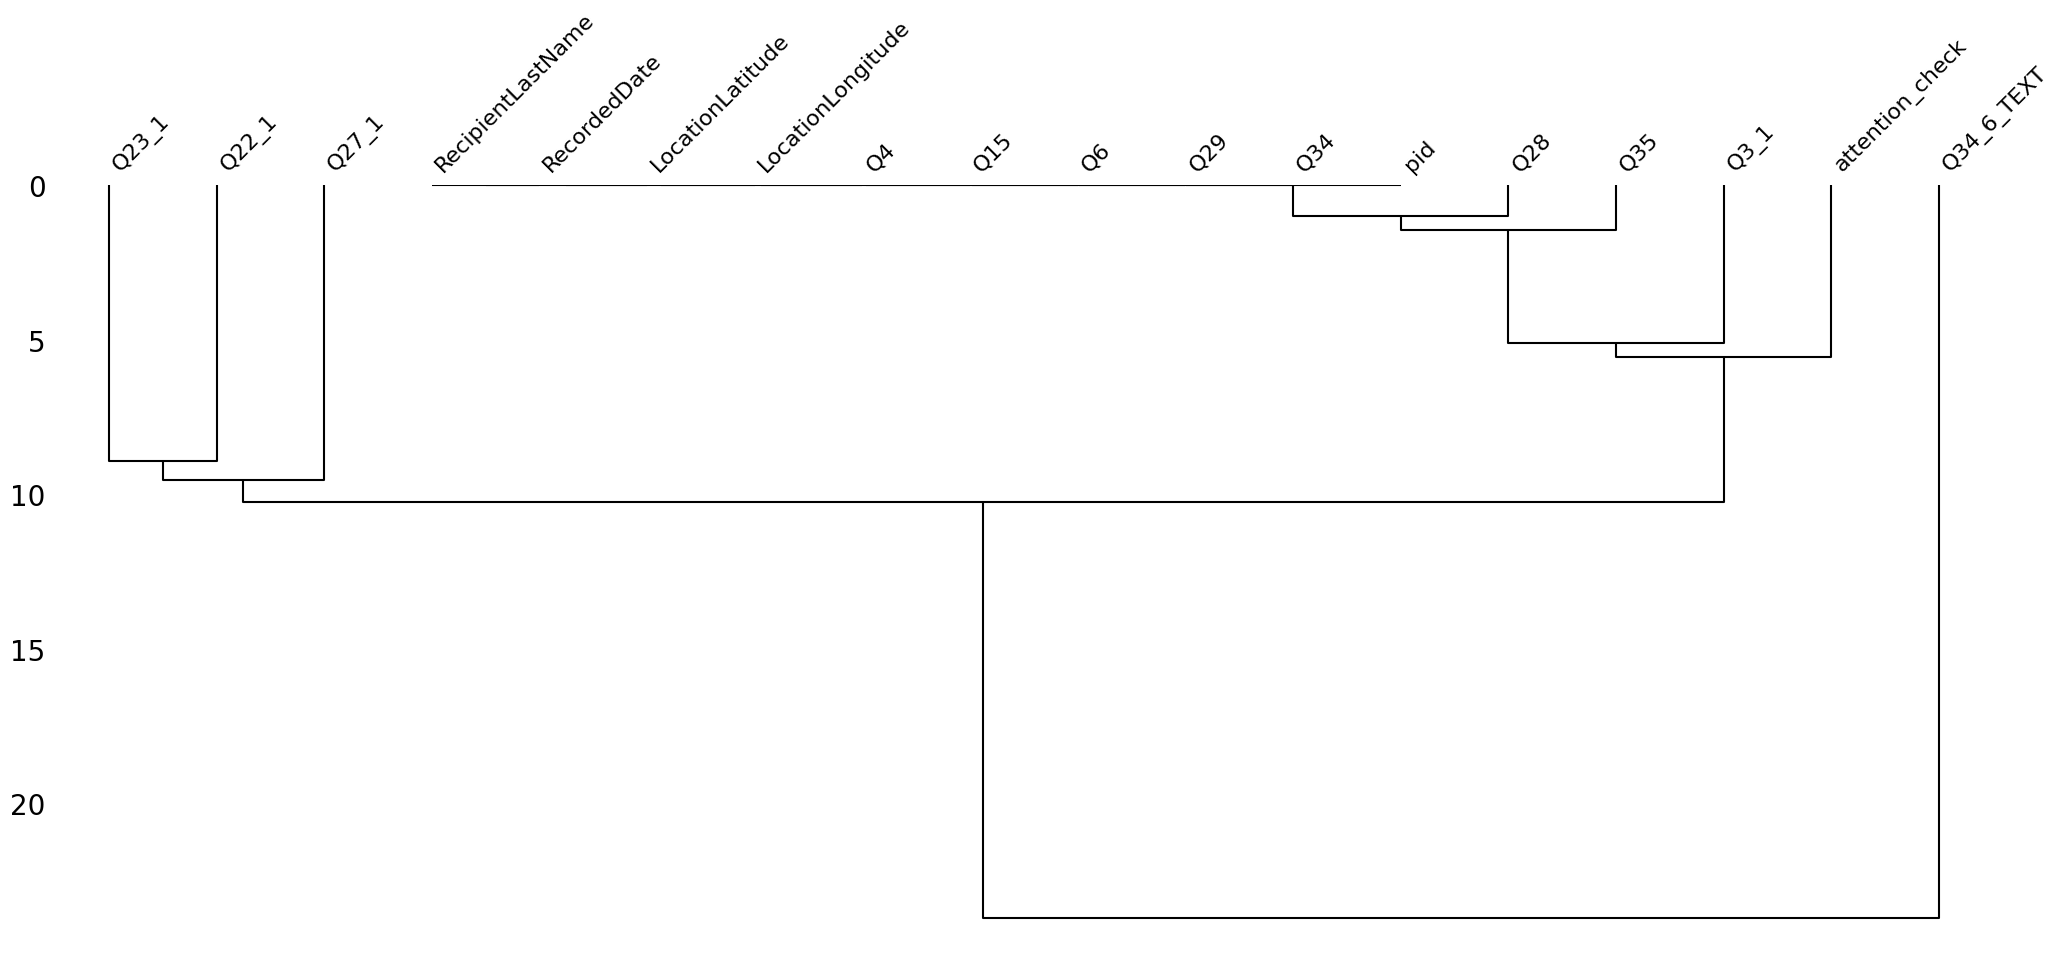

In [94]:
msno.dendrogram(daily)

In [98]:
#### Lets look into why there are missing values

In [99]:
# Q22_1, Q23_1, Q27_1 have the most missing values
# Q22_1: stressed(1)-relaxed(5); defeault(3)
# Q23_1: distracted(1)-productive(5); default(3)
# Q27_1: extremely bad(1)-extremely good(7); default(4)

# rename Q22_1 to stress
daily.rename(columns={"Q22_1":"stress"},inplace=True)
# rename Q23_1 to productivity
daily.rename(columns={"Q23_1":"productivity"},inplace=True)

In [100]:
# stress and productivity were defaulted to 3 and so that may be why there are NAs
# distribution of stress (Q22_1) for each participant with stress as x axis and count as y axis
fig = px.histogram(daily, x="stress", color="pid",
                labels={
                    "stress": "Stress",
                    "pid": "Participants"
                })
fig.show()

In [101]:
# stress and productivity were defaulted to 3 and so that may be why there are NAs
# distribution of productivity for each participant with stress as x axis and count as y axis
fig = px.histogram(daily, x="productivity", color="pid",
                labels={
                    "productivity": "Productivity",
                    "pid": "Participants"
                })
fig.show()

In [102]:
# Q27_1
fig = px.histogram(daily, x="Q27_1", color="pid",
                labels={
                    "Q27_1": "Mood",
                    "pid": "Participants"
                })
fig.show()
